## **Import Libraries**

In [2]:
#!pip install -r requirements.txt


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import requests
import json
from PIL import Image
import requests
from io import BytesIO

# Extract Data from website Json file

In [ ]:
# Use this when you have a list of websites and want to extract data from all 
# and combine it to one big dataset
"""

urls = [

    "https://www.boysnextdoor-apparel.co/collections/all/products.json"
]

all_products = []

for url in urls:
    page = 1
    while True:
        response = requests.get(f"{url}?page={page}")
        if response.ok:
            products = json.loads(response.content)["products"]
            if not products:
                break
            all_products.extend(products)
            page += 1
        else:
            break

print(f"Retrieved {len(all_products)} products from {len(urls)} websites.")

# Save the combined dataset as a JSON file
with open("productInfo.json", "w") as f:
    json.dump(all_products, f)

"""

'\n\nurls = [\n\n    "https://www.boysnextdoor-apparel.co/collections/all/products.json"\n]\n\nall_products = []\n\nfor url in urls:\n    page = 1\n    while True:\n        response = requests.get(f"{url}?page={page}")\n        if response.ok:\n            products = json.loads(response.content)["products"]\n            if not products:\n                break\n            all_products.extend(products)\n            page += 1\n        else:\n            break\n\nprint(f"Retrieved {len(all_products)} products from {len(urls)} websites.")\n\n# Save the combined dataset as a JSON file\nwith open("productInfo.json", "w") as f:\n    json.dump(all_products, f)\n\n'

In [ ]:

def get_all_products(url):
    all_products = []
    page = 1
    while True:
        response = requests.get(f"{url}?page={page}")
        if response.ok:
            products = json.loads(response.content)["products"]
            if not products:
                break
            all_products.extend(products)
            page += 1
        else:
            break

    print(f"Retrieved {len(all_products)} products from {url}.")
    return all_products


# Provide the inputs for the program here

In [ ]:
# Set the base URL for the website
base_url = 'https://www.woolsboutiqueuomo.com//'
data_url = "https://www.woolsboutiqueuomo.com/collections/all/products.json"

# Enter the id of the product which you want to find similar products of
product_identifier = '8392243675465'

all_products = get_all_products(data_url)

# Save the combined dataset as a JSON file
with open("productInfo.json", "w") as f:
    json.dump(all_products, f)


Retrieved 668 products from https://www.woolsboutiqueuomo.com/collections/all/products.json.


In [ ]:
"""
# Set the base URL for the website
base_url = 'https://www.boysnextdoor-apparel.co//'
data_url = "https://www.boysnextdoor-apparel.co/collections/all/products.json"

all_products = get_all_products(url)

# Save the combined dataset as a JSON file
with open("productInfo.json", "w") as f:
    json.dump(all_products, f)
"""

'\n# Set the base URL for the website\nbase_url = \'https://www.boysnextdoor-apparel.co//\'\ndata_url = "https://www.boysnextdoor-apparel.co/collections/all/products.json"\n\nall_products = get_all_products(url)\n\n# Save the combined dataset as a JSON file\nwith open("productInfo.json", "w") as f:\n    json.dump(all_products, f)\n'

# Load Dataset

In [ ]:
# Load data from JSON file
with open('productInfo.json', 'r') as f:
    data = json.load(f)

# Create a list of dictionaries for each product with required features
# Create a list of dictionaries for each product with required features
products = []
for p in data:
    product_dict = {'product_id':str(p['id']),'title': p['title'], 'vendor': p['vendor'], 'product_type': p['product_type'], 'tags': p['tags'], 'handle': p['handle'], 'images': p['images']}
    products.append(product_dict)

# Print the list of product dictionaries
print(len(products))
print(products[:3])


668
[{'product_id': '6812735111215', 'title': '19andreas47 Handmade Cashmere Shawl Plaid Multicolor', 'vendor': "19 ANDREA'S 47", 'product_type': 'Scarves', 'tags': [], 'handle': 'cashmere-shrug-stole-shawl-multicolor', 'images': [{'id': 30455829889071, 'created_at': '2021-12-10T01:02:35+01:00', 'position': 1, 'updated_at': '2021-12-10T01:02:37+01:00', 'product_id': 6812735111215, 'variant_ids': [], 'src': 'https://cdn.shopify.com/s/files/1/0527/9877/products/19andreas47-cashmere-shawl-plaid-multicolor_01.jpg?v=1639094557', 'width': 800, 'height': 800}, {'id': 30455829856303, 'created_at': '2021-12-10T01:02:35+01:00', 'position': 2, 'updated_at': '2021-12-10T01:02:39+01:00', 'product_id': 6812735111215, 'variant_ids': [], 'src': 'https://cdn.shopify.com/s/files/1/0527/9877/products/19andreas47-cashmere-shawl-plaid-multicolor_03.jpg?v=1639094559', 'width': 800, 'height': 800}, {'id': 30455829921839, 'created_at': '2021-12-10T01:02:35+01:00', 'position': 3, 'updated_at': '2021-12-10T01:0

# Dataframe creation and preprocessing

In [ ]:
# Create a pandas dataframe from products list
df = pd.DataFrame(products)

In [ ]:
# drop duplicates based on product_id
df.drop_duplicates(subset='product_id', keep='first', inplace=True)
# remove any NaN values
df = df.dropna()
# convert 'tags' column to string type
df['tags'] = df['tags'].astype(str)
df.shape

(668, 7)

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text data
def clean_text(text):
    # Remove special characters
    text = re.sub(r'\W+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Lemmatize words
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

# Apply text cleaning to the title and tags columns
df['title'] = df['title'].apply(clean_text)
df['tags'] = df['tags'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Add URL to product and URL to image columns to the DataFrame
df['product_url'] = df.apply(lambda row: f"{base_url}product/{row['handle']}", axis=1)
df['image_url'] = df.apply(lambda row: row['images'][0]['src'] if row['images'] else None, axis=1)


In [ ]:
# Add URL to product and URL to image columns to the DataFrame
df['product_url'] = df['handle'].apply(lambda x: f"https://www.boysnextdoor-apparel.co/products/{x}")
df['image_url'] = df['images'].apply(lambda x: x[0]['src'] if len(x)>0 else None)

# Generate Word embeddings

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_file, word2vec_output_file)

from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


<ipython-input-13-06335932ac26>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_output_file)


In [ ]:
# Function to generate word embeddings for a text string
def get_word_embeddings(text):
    # Split text into individual words
    words = text.split()

    # Initialize an empty array for storing the embeddings
    embeddings = []

    # Iterate over each word in the text
    for word in words:
        # Check if the word is in the vocabulary
        if word in word_vectors.key_to_index:
            # If the word is in the vocabulary, add its embedding to the list
            embeddings.append(word_vectors[word])

    # If no valid embeddings were found, return None
    if len(embeddings) == 0:
        return None

    # Otherwise, calculate the mean of the embeddings and return the result
    return np.mean(embeddings, axis=0)

# Generate word embeddings for each product
df['title_vec'] = df['title'].apply(get_word_embeddings)
df['tag_vec'] = df['tags'].apply(get_word_embeddings)


# Get similarity score by calculating Cosine Similarity

In [ ]:


def get_similar_products(product_id, num_similar=5):
    # Get the embedding vector for the specified product
    embedding = df.loc[df['product_id'] == product_id, 'title_vec'].values[0]
    
    # Calculate the cosine similarity between the specified product and all other products
    similarities = cosine_similarity(df['title_vec'].tolist(), [embedding])
    
    # Get the indices of the most similar products
    similar_indices = np.argsort(similarities.ravel())[::-1][:num_similar+1]
    
    # Exclude the specified product from the list of similar products
    similar_indices = similar_indices[similar_indices != df.index[df['product_id'] == product_id][0]]
    
    # Get the details of the specified product
    product = df.loc[df['product_id'] == product_id].iloc[0]
    
    # Print the details of the specified product
    print(f"Product ID: {product['product_id']}")
    print(f"Title: {product['title']}")
    print(f"Product Type: {product['product_type']}")
    print(f"Vendor: {product['vendor']}")
    print(f"Tags: {product['tags']}")
    print(f"Product URL: {product['product_url']}")
    print(f"Image URL: {product['image_url']}")
    
    # Open the image and resize it
    response = requests.get(product['image_url'])
    img = Image.open(BytesIO(response.content))
    img = img.resize((300, 300))  # Change the dimensions as per your requirement
    img.show()
    
    # Print the details of the similar products
    print("\n******************************\n")
    print("\nSimilar products:\n")
    for i in similar_indices:
        product = df.iloc[i]
        print(f"Product ID: {product['product_id']}")
        print(f"Title: {product['title']}")
        print(f"Product Type: {product['product_type']}")
        print(f"Vendor: {product['vendor']}")
        print(f"Tags: {product['tags']}")
        print(f"Product URL: {product['product_url']}")
        print(f"Image URL: {product['image_url']}")
        
        # Open the image and resize it
        response = requests.get(product['image_url'])
        img = Image.open(BytesIO(response.content))
        img = img.resize((300, 300))  # Change the dimensions as per your requirement
        img.show()
        
        print(f"Similarity score: {similarities[i][0]:.4f}")
        print()


# Find similar products for a Product ID based on the Similarity score

Product ID: 8392243675465
Title: borriello dark blue classic denim shirt
Product Type: Shirts
Vendor: BORRIELLO
Tags: whats new
Product URL: https://www.boysnextdoor-apparel.co/products/borriello-dark-blue-classic-denim-shirt
Image URL: https://cdn.shopify.com/s/files/1/0527/9877/files/borriello-denim-shirt-light-dark-blue-01.jpg?v=1682652372


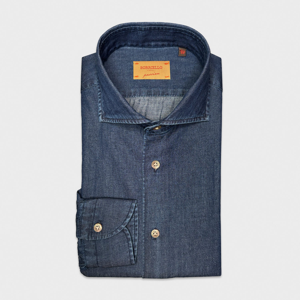


******************************


Similar products:

Product ID: 8392204976457
Title: borriello light blue classic denim shirt
Product Type: Shirts
Vendor: BORRIELLO
Tags: whats new
Product URL: https://www.boysnextdoor-apparel.co/products/borriello-light-blue-classic-denim-shirt
Image URL: https://cdn.shopify.com/s/files/1/0527/9877/files/borriello-denim-shirt-light-blue-01.jpg?v=1682649315


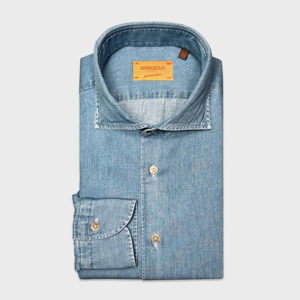

Similarity score: 0.9807

Product ID: 8392250261833
Title: borriello light blue western denim shirt
Product Type: Shirts
Vendor: BORRIELLO
Tags: whats new
Product URL: https://www.boysnextdoor-apparel.co/products/borriello-light-blue-western-denim-shirt
Image URL: https://cdn.shopify.com/s/files/1/0527/9877/files/borriello-western-denim-shirt-light-blue-01.jpg?v=1682676289


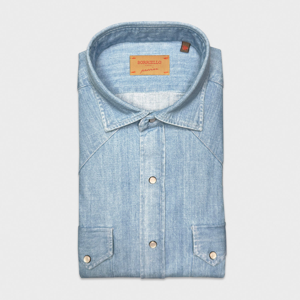

Similarity score: 0.9355

Product ID: 4800623116335
Title: finamore men denim shirt dark blue
Product Type: Shirts
Vendor: FINAMORE
Tags: christmas restocked
Product URL: https://www.boysnextdoor-apparel.co/products/finamore-mens-shirt-darkblue
Image URL: https://cdn.shopify.com/s/files/1/0527/9877/products/finamore_mens_denim_shirt_darkblue_01.jpg?v=1603907266


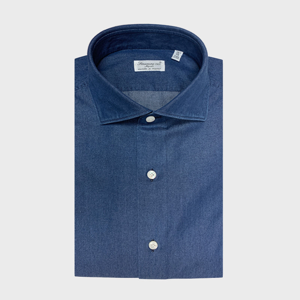

Similarity score: 0.9124

Product ID: 4761733791791
Title: finamore men denim shirt light blue
Product Type: Shirts
Vendor: FINAMORE
Tags: christmas restocked
Product URL: https://www.boysnextdoor-apparel.co/products/finamore-mens-denim-shirt-lightblue
Image URL: https://cdn.shopify.com/s/files/1/0527/9877/products/finamore_mens_denim_shirt_lightblue_01.jpg?v=1601660439


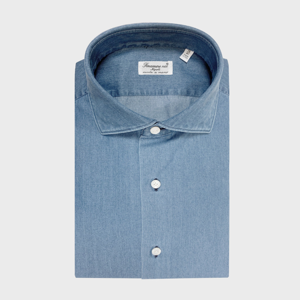

Similarity score: 0.8890

Product ID: 7034406567983
Title: finamore men classic western denim shirt light blue
Product Type: Shirts
Vendor: FINAMORE
Tags: 
Product URL: https://www.boysnextdoor-apparel.co/products/western-denim-shirt-lightblue-finamore
Image URL: https://cdn.shopify.com/s/files/1/0527/9877/products/western-denim-shirt-finamore-01.jpg?v=1654773288


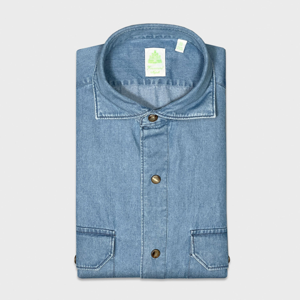

Similarity score: 0.8828



In [ ]:

if product_identifier not in df['product_id'].unique():
    print(f"The product ID {product_identifier} does not exist in the DataFrame.")
else:
    get_similar_products(product_identifier)
